# Correlation Matrix

To understand the relationship each features, we could use correlation matrix as follows

In [1]:
# Basic Setup
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
diabetes = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)

# Declare our target to be predicted
diabetes['bmi'] = diabetes_dataset.target

In [2]:
corr_matrix = diabetes.corr().round(2)
corr_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30
sex,0.17,1.00,0.04,0.24,0.04,0.14,-0.38,0.33,0.15,0.21
bmi,0.19,0.04,1.00,0.44,0.21,0.17,-0.39,0.43,0.57,0.38
bp,0.34,0.24,0.44,1.00,0.24,0.19,-0.18,0.26,0.39,0.39
s1,0.26,0.04,0.21,0.24,1.00,0.90,0.05,0.54,0.52,0.33
s2,0.22,0.14,0.17,0.19,0.90,1.00,-0.20,0.66,0.32,0.29
s3,-0.08,-0.38,-0.39,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27
s4,0.20,0.33,0.43,0.26,0.54,0.66,-0.74,1.00,0.62,0.42
s5,0.27,0.15,0.57,0.39,0.52,0.32,-0.40,0.62,1.00,0.46
s6,0.30,0.21,0.38,0.39,0.33,0.29,-0.27,0.42,0.46,1.00


### Preparing Data

Feature Selection

C:\Users\Iannn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='s5', ylabel='bmi'>

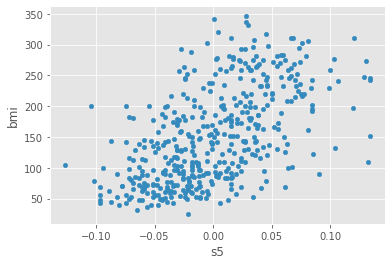

In [3]:
# As you can see on the dataset above, we could determine the s5 (ltg, possibly log of serum triglycerides level) and bmi is the most correlated to each other with direct relationship
diabetes.plot(kind='scatter', x='s5', y='bmi')

In [4]:
# Since our target is for predicting bmi, I think the most suitable pair is s5 with the score of corr = 0.57. Thus we could change the s5 to be two dimensional matrix
predict = diabetes[['s5']]
predict.shape

(442, 1)

In [5]:
X_Predict = diabetes[['s5']]
Y_Predict = diabetes['bmi']

## Fitting

Now let's fit a univariate linear regression model using sklearn

In [6]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model

LinearRegression()

After Initiate the Linear Regression, we split the data into training and testing sets using train_test_split function below

We will use 70-30 proportion, which means 70% data is for training and 30% is for the test.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_Predict, Y_Predict, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(309, 1)
(133, 1)
(309,)
(133,)


In [8]:
X_train.head(n=5)

,s5
332,0.057108
307,0.023371
328,-0.001496
275,0.011011
414,0.054720


In [9]:
Y_train.head(n=5)

332    270.0
307    172.0
328     78.0
275     94.0
414    131.0
Name: bmi, dtype: float64

Now fit it into our model

In [10]:
linear_model.fit(X_train, Y_train)

LinearRegression()

Estimating the parameter

Where .intercept_ is similar with the b and .coef_ is similar with m

In [11]:
linear_model.intercept_

153.2897416529381

In [12]:
linear_model.coef_

array([930.23764067])

Once the model is trained, we could make a forecast using the predict function below

In [13]:
import numpy as np

In [14]:
new_s5 = np.array([0.08]).reshape(-1, 1)
linear_model.predict(new_s5)

C:\Users\Iannn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([227.70875291])

In [15]:
# The value above will resulting the same just as like follows
linear_model.intercept_ + linear_model.coef_*0.08

array([227.70875291])

Evaluating the model

In [16]:
# Since we want to predict the y (s5), thus we need to predict regarding the X or the bmi first
predicted_s5 = linear_model.predict(X_test)

Text(0, 0.5, 'bmi')

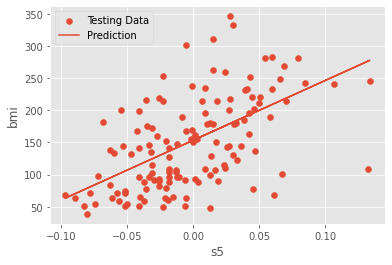

In [21]:
plt.scatter(X_test, Y_test, label='Testing Data')
plt.plot(X_test, predicted_s5, label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('s5')
plt.ylabel('bmi')

There is so many residuals right? Let's find it

Text(0, 0.5, 'residuals')

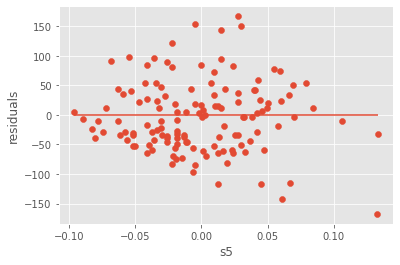

In [22]:
residuals = Y_test - predicted_s5

plt.scatter(X_test, residuals)
plt.hlines(y=0, xmin=X_test.min(), xmax=X_test.max())
# plt.xlim((-0.05, 0.05))

plt.xlabel('s5')
plt.ylabel('residuals')

### Model Performance

In [23]:
residuals[:5]

246   -117.212342
425     17.586939
293     97.445085
31     -59.751098
359    143.923225
Name: bmi, dtype: float64

In [24]:
# How about the model performance for all data points?
residuals.mean()

-3.8426000796892805

-3.84 is quite close to 0, but there’s a problem: residuals can be positive or negative so taking the average cancels them out. **That’s not an accurate metric**. To solve this, we take a square of each residual, then take the mean of squares. This is called mean squared error (MSE):

In [25]:
(residuals**2).mean()

3575.48313258527

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, predicted_s5)
np.sqrt(mse)

59.79534373665955

In [29]:
np.var(Y_test)

5034.469105093562

We could also use R-Squared Method

In [31]:
linear_model.score(X_test, Y_test)

0.28979936951687324

In [32]:
# Or
print(((Y_test-Y_test.mean())**2).sum())
print((residuals**2).sum())

669584.3909774437
475539.2566338409


In [33]:
1-475539.2566338409/669584.3909774437

0.28979936951687324

According to the result, We can say that this model is bad since the score of r-squared is low

However, it will be wise to complete the DS Course first for this since IDK anything about this :(